Dataset 1 shape: (500, 9)
Dataset 2 shape: (500, 9)
Combined dataset shape: (1000, 9)


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16



Missing values per column:
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

Missing values after cleaning:
0 missing values remaining

Descriptive statistics:


,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,6.561060e+02,0.009697,0.023683,0.023366,2.873441e+08,3.755304e+09
std,4.584655e+03,0.026842,0.059098,0.228869,2.760286e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11



Column names:
['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']


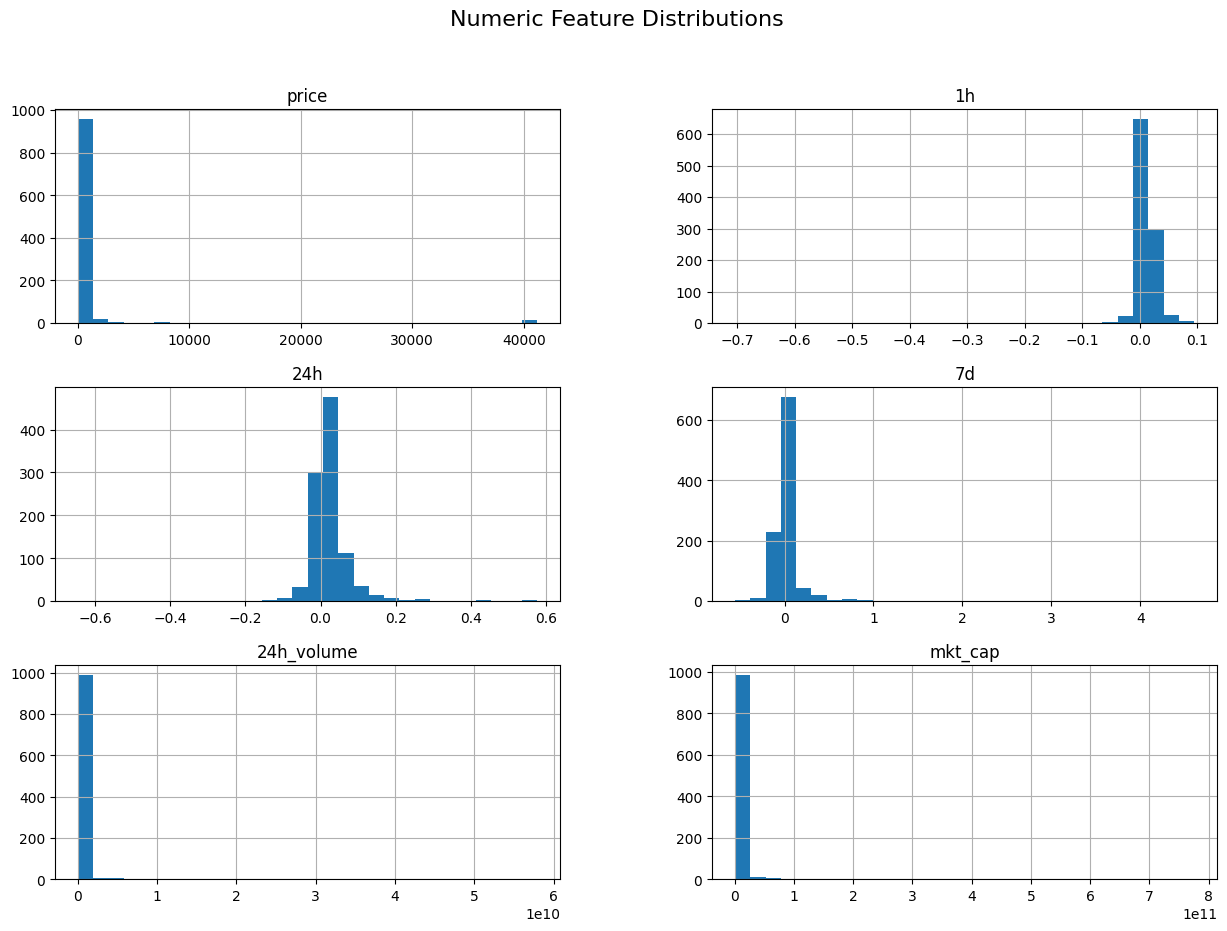

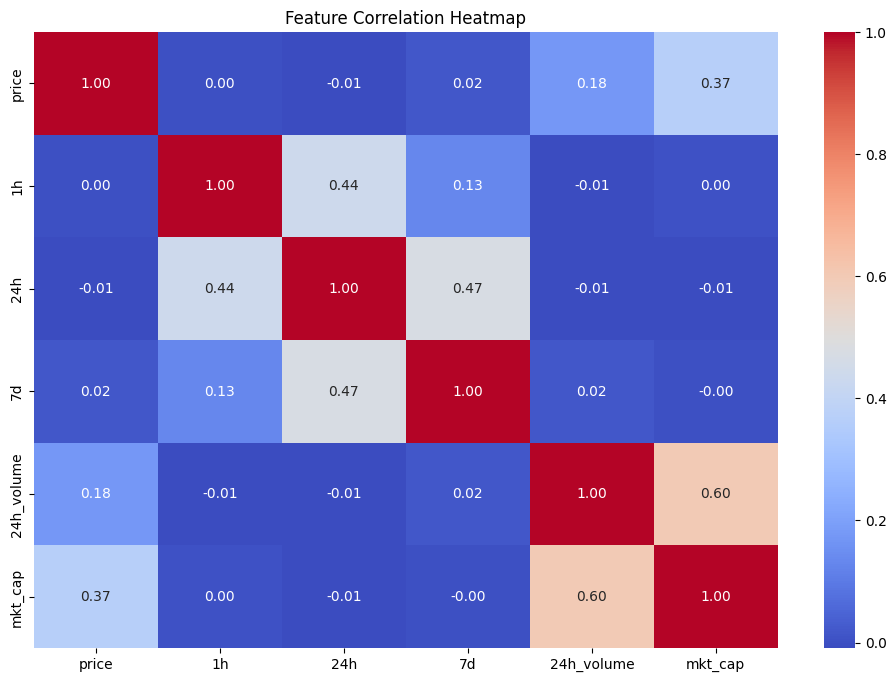


Cleaned dataset saved as: c:\Users\amod kumar\Downloads\Cryptocurrency-Prediction\crypto_pred\notebooks\cleaned_coin_gecko_combined.csv


In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Load the datasets
df1 = pd.read_csv("coin_gecko_2022-03-16.csv")
df2 = pd.read_csv("coin_gecko_2022-03-17.csv")

# Step 2: Display basic info
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

# Step 3: Combine both datasets
df = pd.concat([df1, df2], ignore_index=True)
print("Combined dataset shape:", df.shape)

# Step 4: Preview data
display(df.head())

# Step 5: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Handle missing data (optional)
# Fill numeric columns with median and categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum().sum(), "missing values remaining")

# Step 7: Basic statistics
print("\nDescriptive statistics:")
display(df.describe())

# Step 8: Check column names
print("\nColumn names:")
print(df.columns.tolist())

# Step 9: Exploratory Data Analysis (EDA)

# 9.1 Distribution of numeric columns
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

# 9.2 Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 9.3 Example: Top 10 coins by market cap (if 'market_cap' exists)
if 'market_cap' in df.columns and 'name' in df.columns:
    top10 = df.groupby('name')['market_cap'].max().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top10.values, y=top10.index, palette="viridis")
    plt.title("Top 10 Cryptocurrencies by Market Cap")
    plt.xlabel("Market Cap")
    plt.ylabel("Coin Name")
    plt.show()

# 9.4 Example: Price vs Volume relationship
if 'current_price' in df.columns and 'total_volume' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='current_price', y='total_volume', alpha=0.7)
    plt.title("Price vs Trading Volume")
    plt.xlabel("Current Price")
    plt.ylabel("Total Volume")
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

# Step 10: Save cleaned dataset
output_path = "cleaned_coin_gecko_combined.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved as: {os.path.abspath(output_path)}")


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Step 11: Normalize numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns to normalize:", numeric_cols.tolist())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform numeric columns
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 12: Verify normalization
print("\nAfter normalization:")
display(df_normalized[numeric_cols].describe().T)

# Step 13: Save normalized dataset
normalized_path = "normalized_coin_gecko_combined.csv"
df_normalized.to_csv(normalized_path, index=False)
print(f"Normalized dataset saved as: {os.path.abspath(normalized_path)}")


Numeric columns to normalize: ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

After normalization:


,count,mean,std,min,25%,50%,75%,max
price,1000.0,0.015918,0.111231,0.0,0.000005,0.000027,0.000175,1.0
1h,1000.0,0.893238,0.033594,0.0,0.882353,0.888611,0.904881,1.0
24h,1000.0,0.547574,0.048322,0.0,0.529027,0.541292,0.556827,1.0
7d,1000.0,0.112537,0.044303,0.0,0.100223,0.107917,0.114983,1.0
24h_volume,1000.0,0.004960,0.047645,0.0,0.000032,0.000144,0.000677,1.0
mkt_cap,1000.0,0.004754,0.049017,0.0,0.000064,0.000188,0.000682,1.0


Normalized dataset saved as: c:\Users\amod kumar\Downloads\Cryptocurrency-Prediction\crypto_pred\notebooks\normalized_coin_gecko_combined.csv


Dataset shape: (1000, 9)

Date range: 2022-03-16 to 2022-03-17

Unique coins: 506


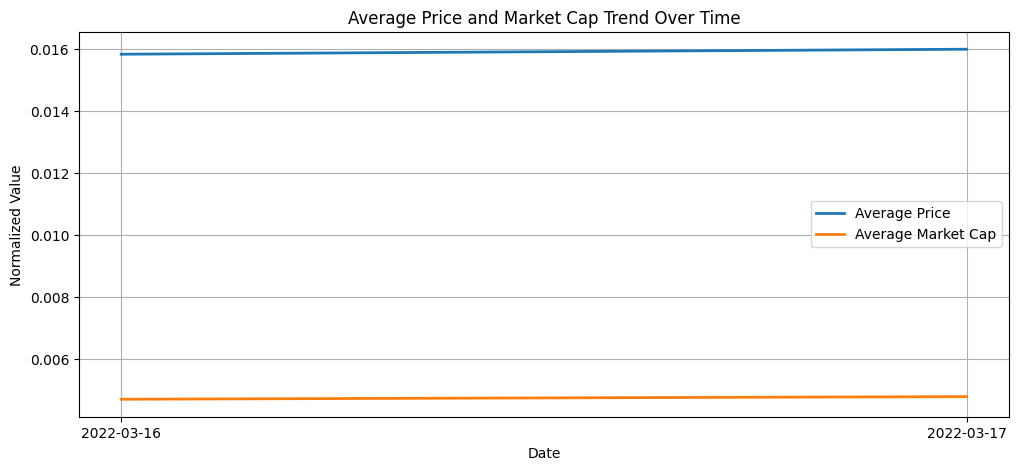

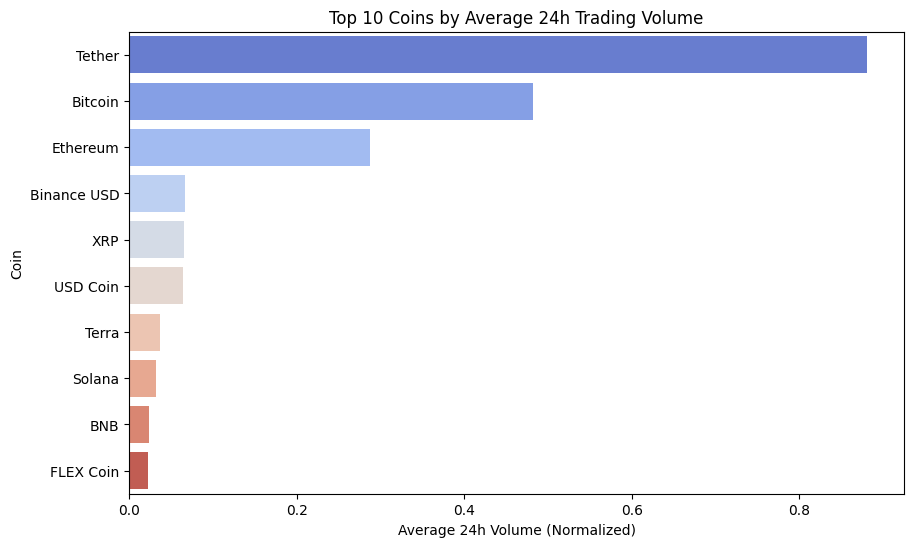

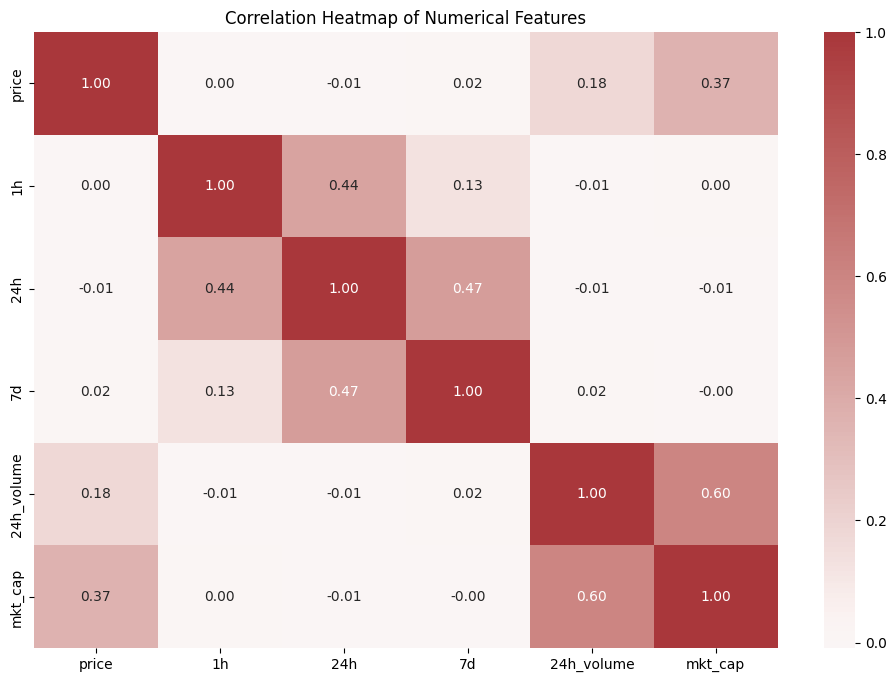

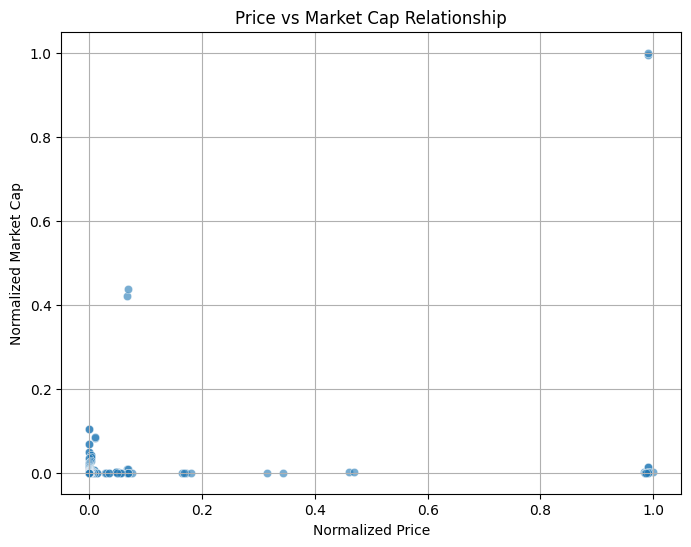

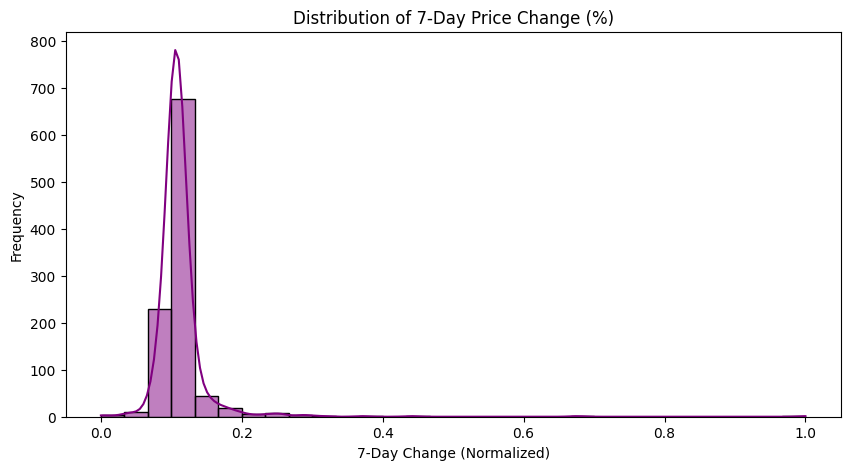


Strong correlations (>|0.6|):


,price,1h,24h,7d,24h_volume,mkt_cap
price,1.0,0.0,0.0,0.0,0.0,0.0
1h,0.0,1.0,0.0,0.0,0.0,0.0
24h,0.0,0.0,1.0,0.0,0.0,0.0
7d,0.0,0.0,0.0,1.0,0.0,0.0
24h_volume,0.0,0.0,0.0,0.0,1.0,0.0
mkt_cap,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Step 14: Data Pattern, Trend, and Correlation Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# 14.1 Basic Overview
print("Dataset shape:", df_normalized.shape)
print("\nDate range:", df_normalized['date'].min(), "to", df_normalized['date'].max())
print("\nUnique coins:", df_normalized['coin'].nunique())

# 14.2 Average price and market cap trends (if available)
if 'price' in df_normalized.columns and 'mkt_cap' in df_normalized.columns:
    trend_data = df_normalized.groupby('date')[['price', 'mkt_cap']].mean().reset_index()

    plt.figure(figsize=(12, 5))
    plt.plot(trend_data['date'], trend_data['price'], label='Average Price', linewidth=2)
    plt.plot(trend_data['date'], trend_data['mkt_cap'], label='Average Market Cap', linewidth=2)
    plt.title("Average Price and Market Cap Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# 14.3 Top traded coins by volume
if '24h_volume' in df_normalized.columns:
    top_volume = df_normalized.groupby('coin')['24h_volume'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_volume.values, y=top_volume.index, palette="coolwarm")
    plt.title("Top 10 Coins by Average 24h Trading Volume")
    plt.xlabel("Average 24h Volume (Normalized)")
    plt.ylabel("Coin")
    plt.show()

# 14.4 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized.corr(numeric_only=True), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 14.5 Price vs Market Cap relationship
if 'price' in df_normalized.columns and 'mkt_cap' in df_normalized.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_normalized, x='price', y='mkt_cap', alpha=0.6)
    plt.title("Price vs Market Cap Relationship")
    plt.xlabel("Normalized Price")
    plt.ylabel("Normalized Market Cap")
    plt.grid(True)
    plt.show()

# 14.6 Price volatility trends (if 7d data exists)
if '7d' in df_normalized.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_normalized['7d'], bins=30, kde=True, color='purple')
    plt.title("Distribution of 7-Day Price Change (%)")
    plt.xlabel("7-Day Change (Normalized)")
    plt.ylabel("Frequency")
    plt.show()

# 14.7 Correlation Insights
corr = df_normalized.corr(numeric_only=True)
strong_corr = corr[(corr > 0.6) | (corr < -0.6)].fillna(0)
print("\nStrong correlations (>|0.6|):")
display(strong_corr)


In [46]:
# Step 15: Feature Engineering – Liquidity-related Features

# Make sure date is in datetime format
df_normalized['date'] = pd.to_datetime(df_normalized['date'])

# Sort for correct rolling calculations
df_normalized = df_normalized.sort_values(by=['coin', 'date']).reset_index(drop=True)

# Create moving averages and volatility for each coin
df_features = df_normalized.copy()

# Check required columns
required_cols = ['coin', 'price', 'mkt_cap', '24h_volume']
for col in required_cols:
    if col not in df_features.columns:
        raise ValueError(f"Missing column: {col}")

# Compute rolling features (using 3-day and 7-day windows)
df_features['price_ma_3'] = df_features.groupby('coin')['price'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df_features['price_ma_7'] = df_features.groupby('coin')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

df_features['price_volatility_3'] = df_features.groupby('coin')['price'].transform(lambda x: x.rolling(window=3, min_periods=1).std().fillna(0))
df_features['price_volatility_7'] = df_features.groupby('coin')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).std().fillna(0))

# Liquidity Ratio = (24h_volume / mkt_cap)
df_features['liquidity_ratio'] = df_features['24h_volume'] / (df_features['mkt_cap'] + 1e-9)

# Display sample
print("✅ New liquidity-related features created successfully!")
display(df_features.head())

# Save engineered dataset
engineered_path = "engineered_liquidity_features.csv"
df_features.to_csv(engineered_path, index=False)
print(f"Engineered dataset saved as: {os.path.abspath(engineered_path)}")


✅ New liquidity-related features created successfully!


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,price_ma_3,price_ma_7,price_volatility_3,price_volatility_7,liquidity_ratio
0,0x,ZRX,0.000012,0.912390,0.556827,0.113434,0.000506,0.000467,2022-03-16,0.000012,0.000012,0.000000e+00,0.000000e+00,1.083997
1,0x,ZRX,0.000013,0.884856,0.541292,0.106078,0.000418,0.000481,2022-03-17,0.000012,0.000012,1.435752e-07,1.435752e-07,0.869075
2,1inch,1INCH,0.000036,0.907384,0.618970,0.139566,0.002079,0.000709,2022-03-16,0.000036,0.000036,0.000000e+00,0.000000e+00,2.931574
3,1inch,1INCH,0.000036,0.891114,0.525756,0.124855,0.001107,0.000711,2022-03-17,0.000036,0.000036,1.715559e-07,1.715559e-07,1.557257
4,AIOZ Network,AIOZ,0.000006,0.939925,0.762878,0.154665,0.000237,0.000062,2022-03-16,0.000006,0.000006,0.000000e+00,0.000000e+00,3.792702


Engineered dataset saved as: c:\Users\amod kumar\Downloads\Cryptocurrency-Prediction\crypto_pred\notebooks\engineered_liquidity_features.csv


In [47]:
import pandas as pd
import numpy as np

# Load your combined, cleaned dataset
df = pd.read_csv("cleaned_coin_gecko_combined.csv")

# Ensure correct data types
numeric_cols = ['price', '24h_volume', 'mkt_cap']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Create rolling features per coin
df_features = pd.DataFrame()

for coin, group in df.groupby('coin'):
    group = group.sort_values('date')
    
    group['price_ma_3'] = group['price'].rolling(window=3, min_periods=1).mean()
    group['price_ma_7'] = group['price'].rolling(window=7, min_periods=1).mean()
    
    group['price_volatility_3'] = group['price'].rolling(window=3, min_periods=1).std().fillna(0)
    group['price_volatility_7'] = group['price'].rolling(window=7, min_periods=1).std().fillna(0)
    
    group['liquidity_ratio'] = group['24h_volume'] / (group['mkt_cap'] + 1e-8)
    
    df_features = pd.concat([df_features, group])

# Save feature-engineered dataset
df_features.to_csv("feature_engineered_dataset.csv", index=False)
print("✅ Feature engineering complete and saved as 'feature_engineered_dataset.csv'")

# Preview
print(df_features.head())


✅ Feature engineering complete and saved as 'feature_engineered_dataset.csv'
             coin symbol     price     1h    24h     7d   24h_volume  \
158            0x    ZRX  0.509791  0.025  0.035  0.028   29309302.0   
659            0x    ZRX  0.518160  0.003  0.016 -0.010   24224308.0   
116         1inch  1INCH  1.500000  0.021  0.111  0.163  120457113.0   
622         1inch  1INCH  1.490000  0.008 -0.003  0.087   64145152.0   
376  AIOZ Network   AIOZ  0.237396  0.047  0.287  0.241   13715452.0   

         mkt_cap        date  price_ma_3  price_ma_7  price_volatility_3  \
158  427933388.0  2022-03-16    0.509791    0.509791            0.000000   
659  439124277.0  2022-03-17    0.513975    0.513975            0.005918   
116  616145134.0  2022-03-16    1.500000    1.500000            0.000000   
622  617505356.0  2022-03-17    1.495000    1.495000            0.007071   
376  114207956.0  2022-03-16    0.237396    0.237396            0.000000   

     price_volatility_7  liquidit

Top coins selected for visualization: ['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin']


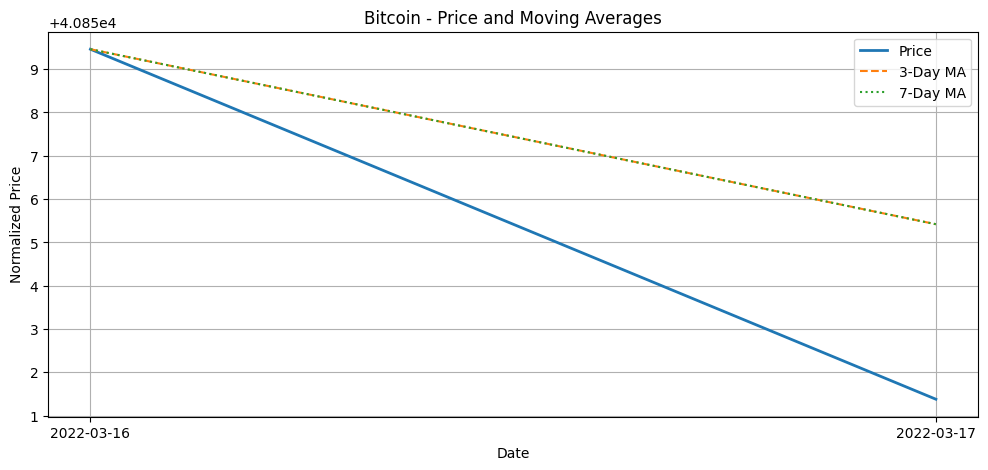

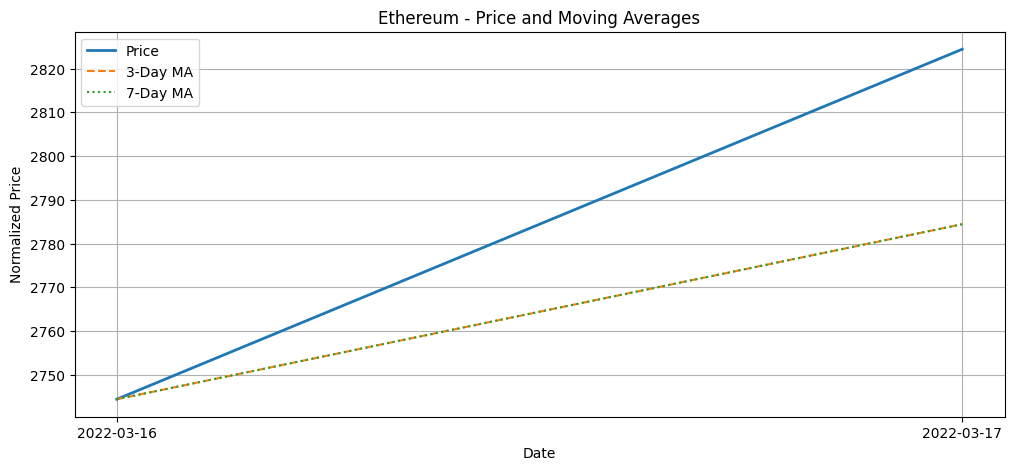

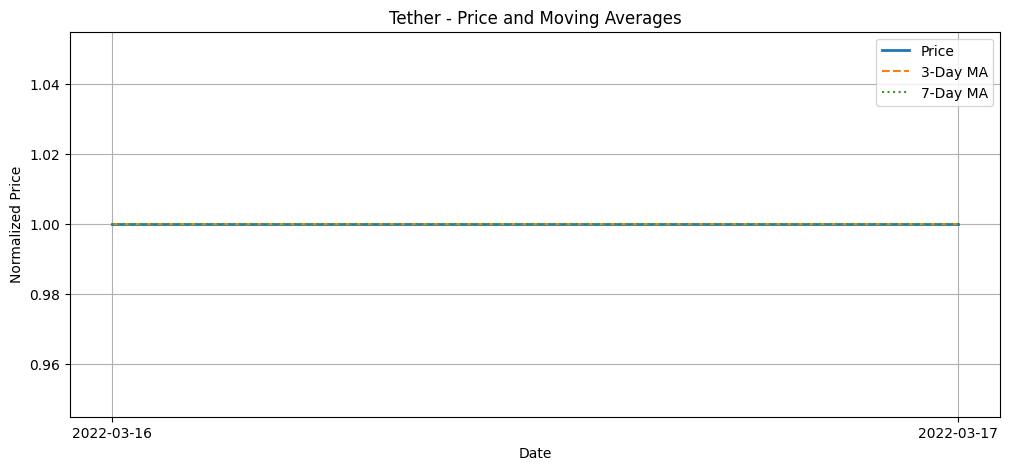

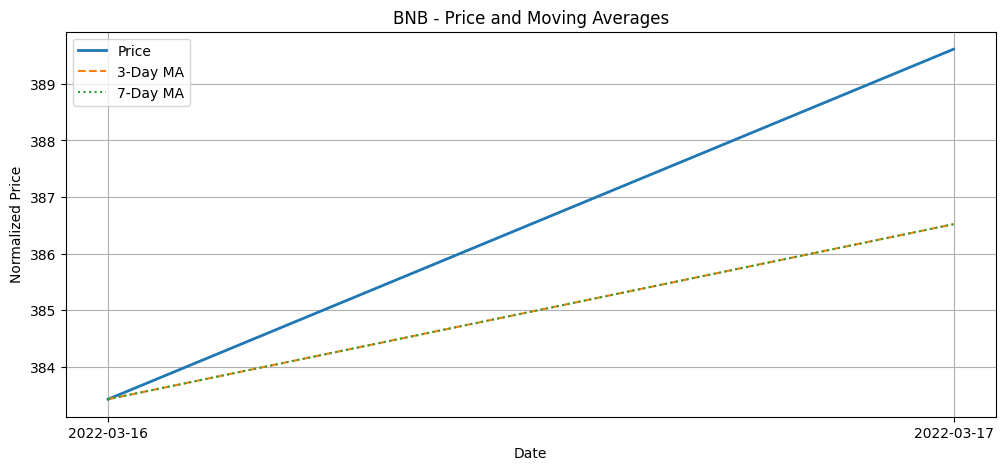

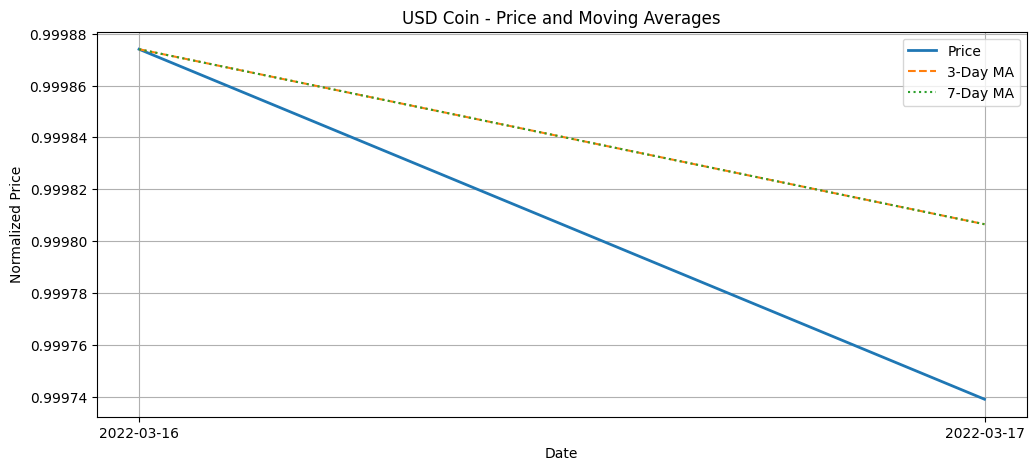

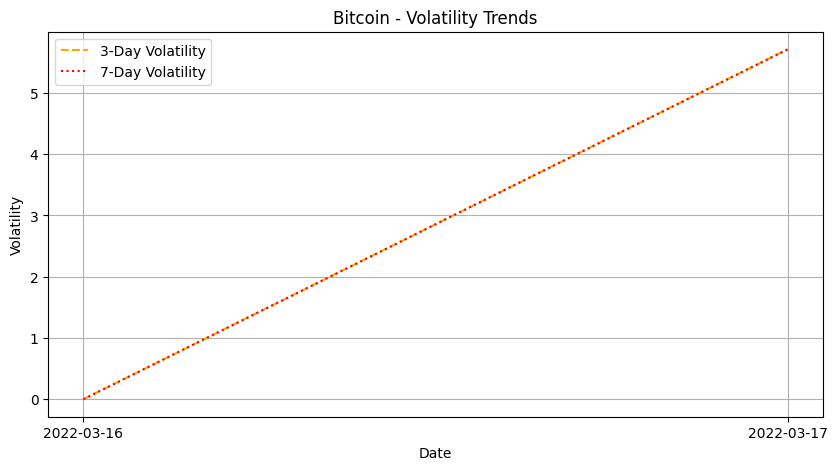

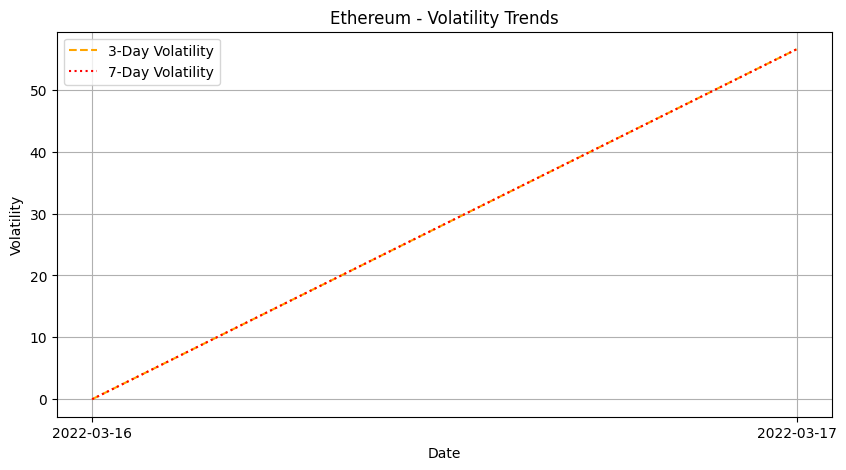

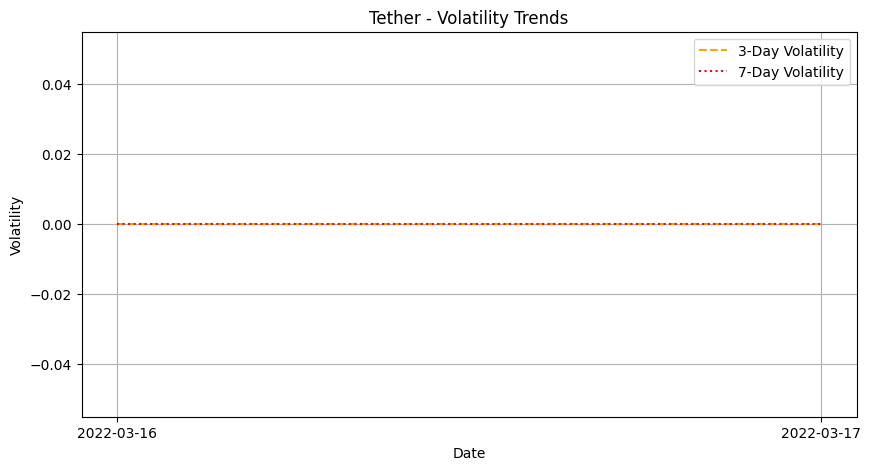

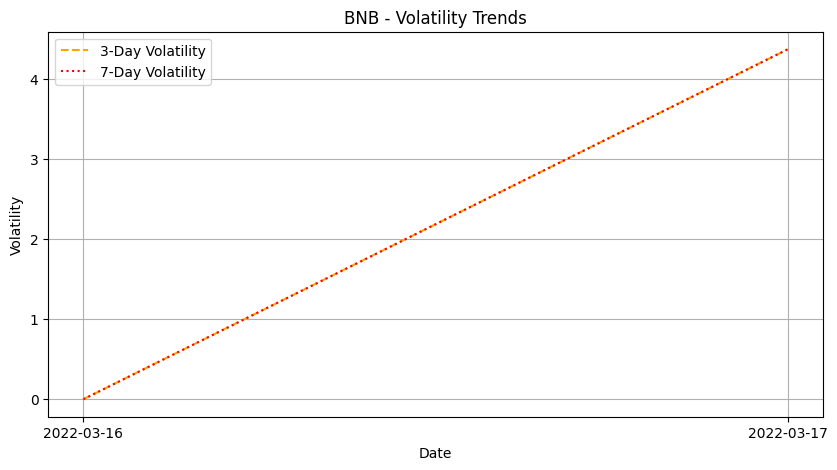

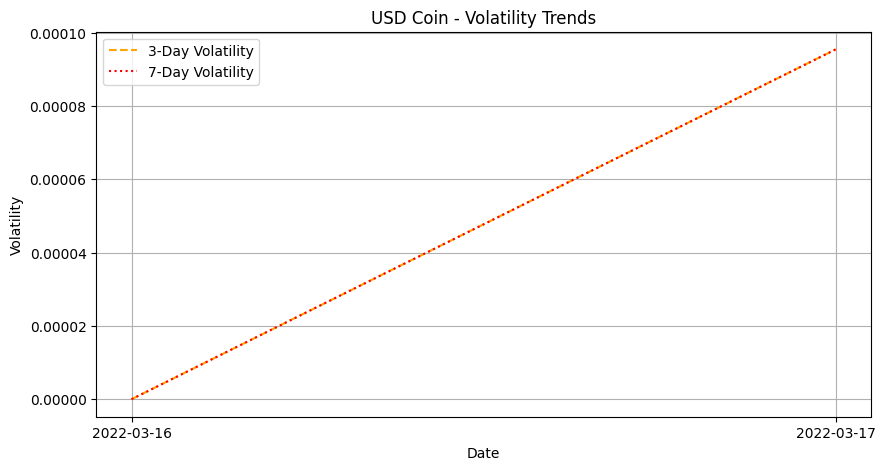

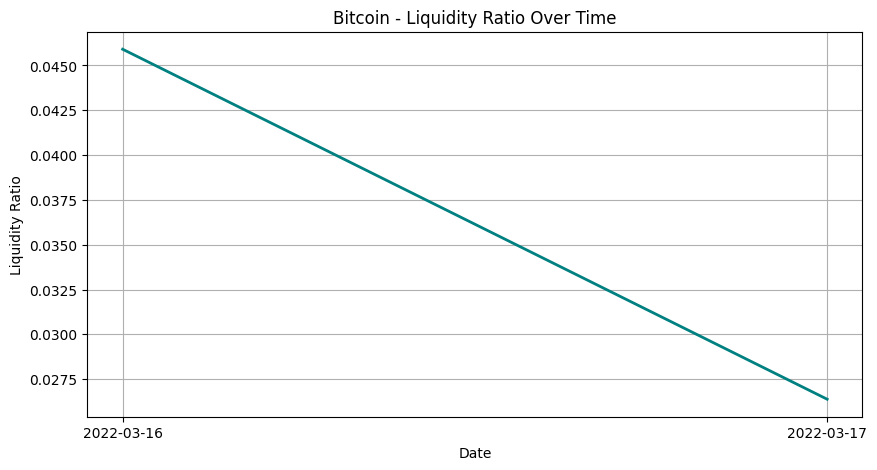

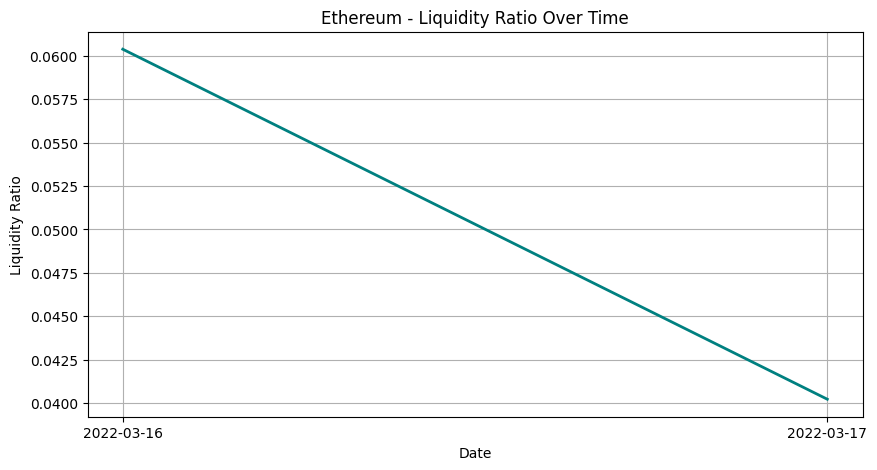

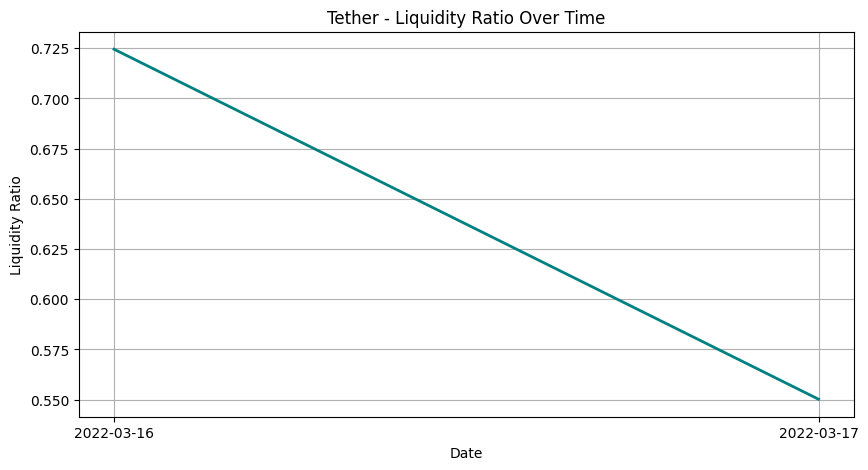

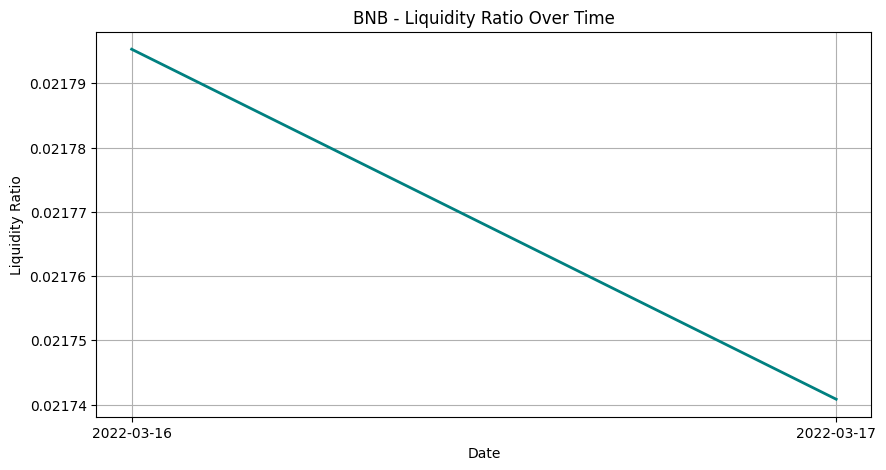

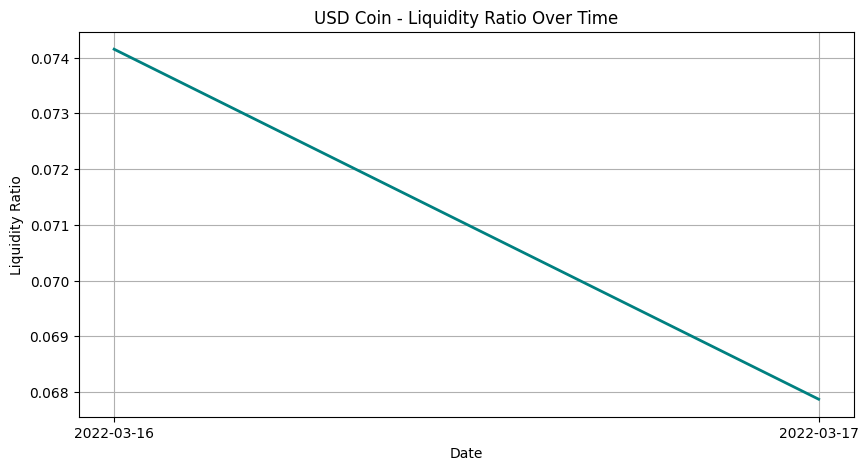

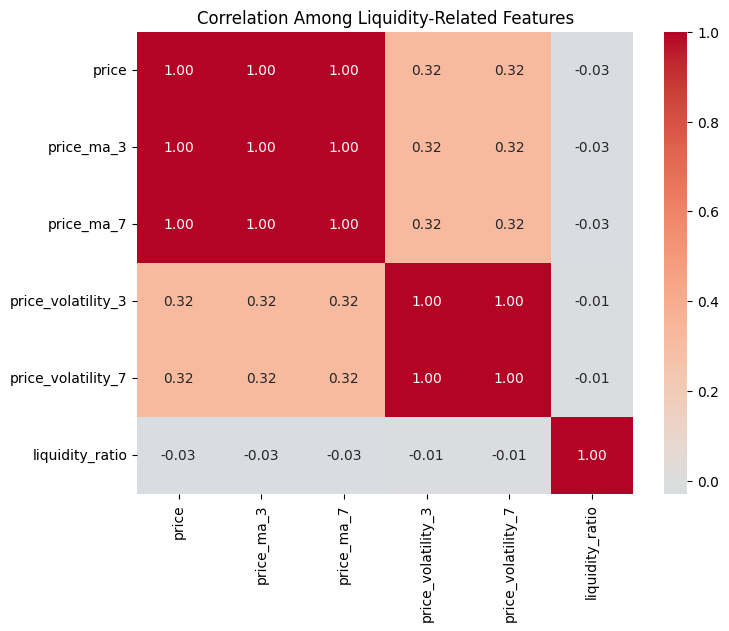

In [48]:
# Step 16: Visualization of Liquidity-Related Features

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date is sorted correctly
df_features = df_features.sort_values(by=['coin', 'date']).reset_index(drop=True)

# Pick top coins by average market cap for clear visualization
top_coins = df_features.groupby('coin')['mkt_cap'].mean().sort_values(ascending=False).head(5).index.tolist()
print("Top coins selected for visualization:", top_coins)

# Plot 1: Price and Moving Averages
for coin in top_coins:
    data = df_features[df_features['coin'] == coin]
    plt.figure(figsize=(12, 5))
    plt.plot(data['date'], data['price'], label='Price', linewidth=2)
    plt.plot(data['date'], data['price_ma_3'], label='3-Day MA', linestyle='--')
    plt.plot(data['date'], data['price_ma_7'], label='7-Day MA', linestyle=':')
    plt.title(f"{coin} - Price and Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot 2: Volatility Trends
for coin in top_coins:
    data = df_features[df_features['coin'] == coin]
    plt.figure(figsize=(10, 5))
    plt.plot(data['date'], data['price_volatility_3'], label='3-Day Volatility', linestyle='--', color='orange')
    plt.plot(data['date'], data['price_volatility_7'], label='7-Day Volatility', linestyle=':', color='red')
    plt.title(f"{coin} - Volatility Trends")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot 3: Liquidity Ratio over Time
for coin in top_coins:
    data = df_features[df_features['coin'] == coin]
    plt.figure(figsize=(10, 5))
    plt.plot(data['date'], data['liquidity_ratio'], color='teal', linewidth=2)
    plt.title(f"{coin} - Liquidity Ratio Over Time")
    plt.xlabel("Date")
    plt.ylabel("Liquidity Ratio")
    plt.grid(True)
    plt.show()

# Plot 4: Correlation Heatmap of Engineered Features
plt.figure(figsize=(8, 6))
sns.heatmap(df_features[['price', 'price_ma_3', 'price_ma_7',
                         'price_volatility_3', 'price_volatility_7',
                         'liquidity_ratio']].corr(),
            annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Among Liquidity-Related Features")
plt.show()


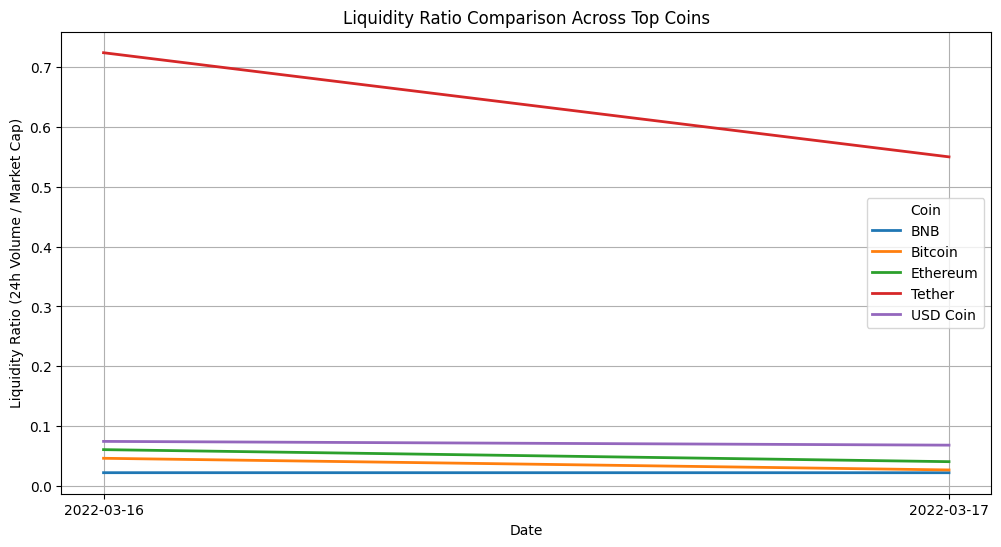

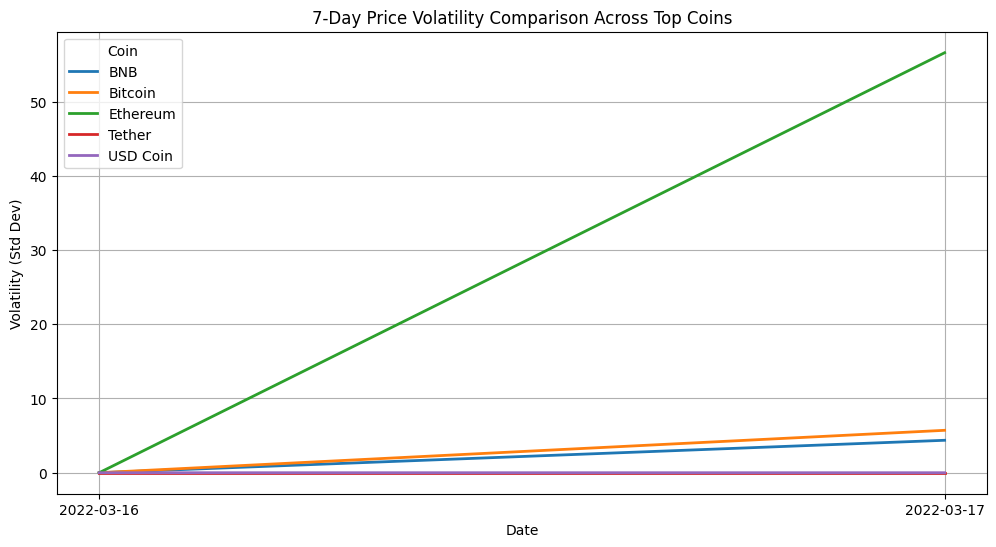

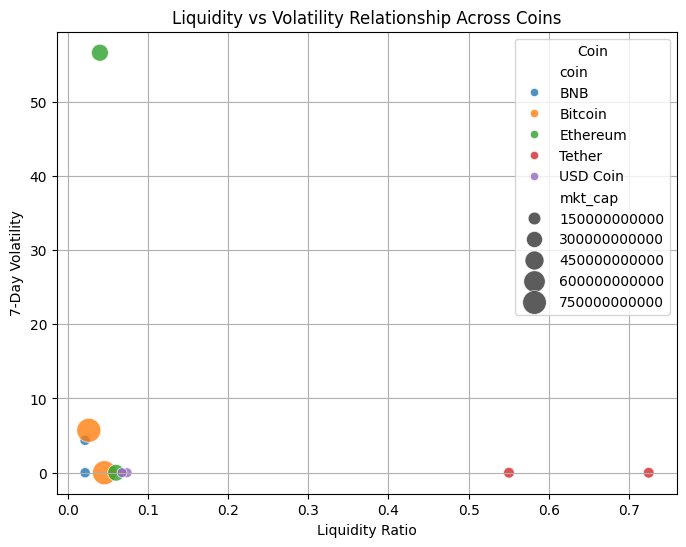

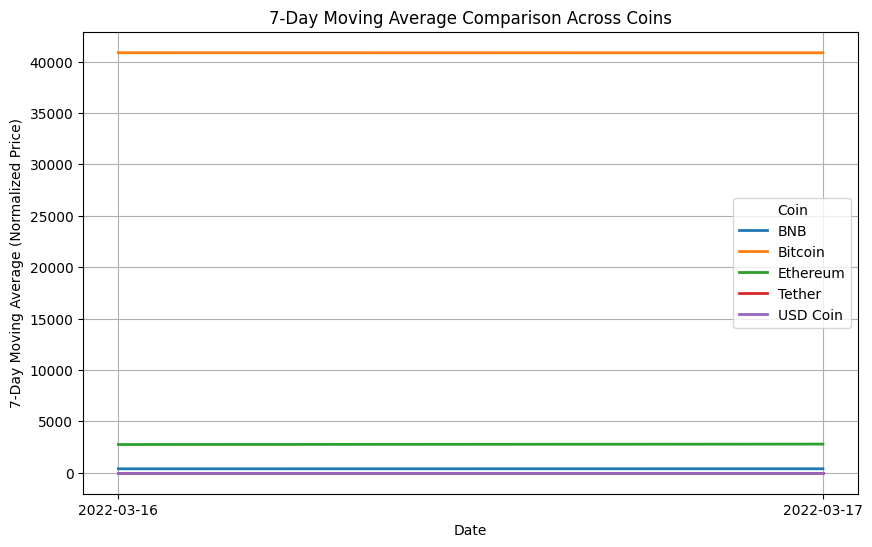

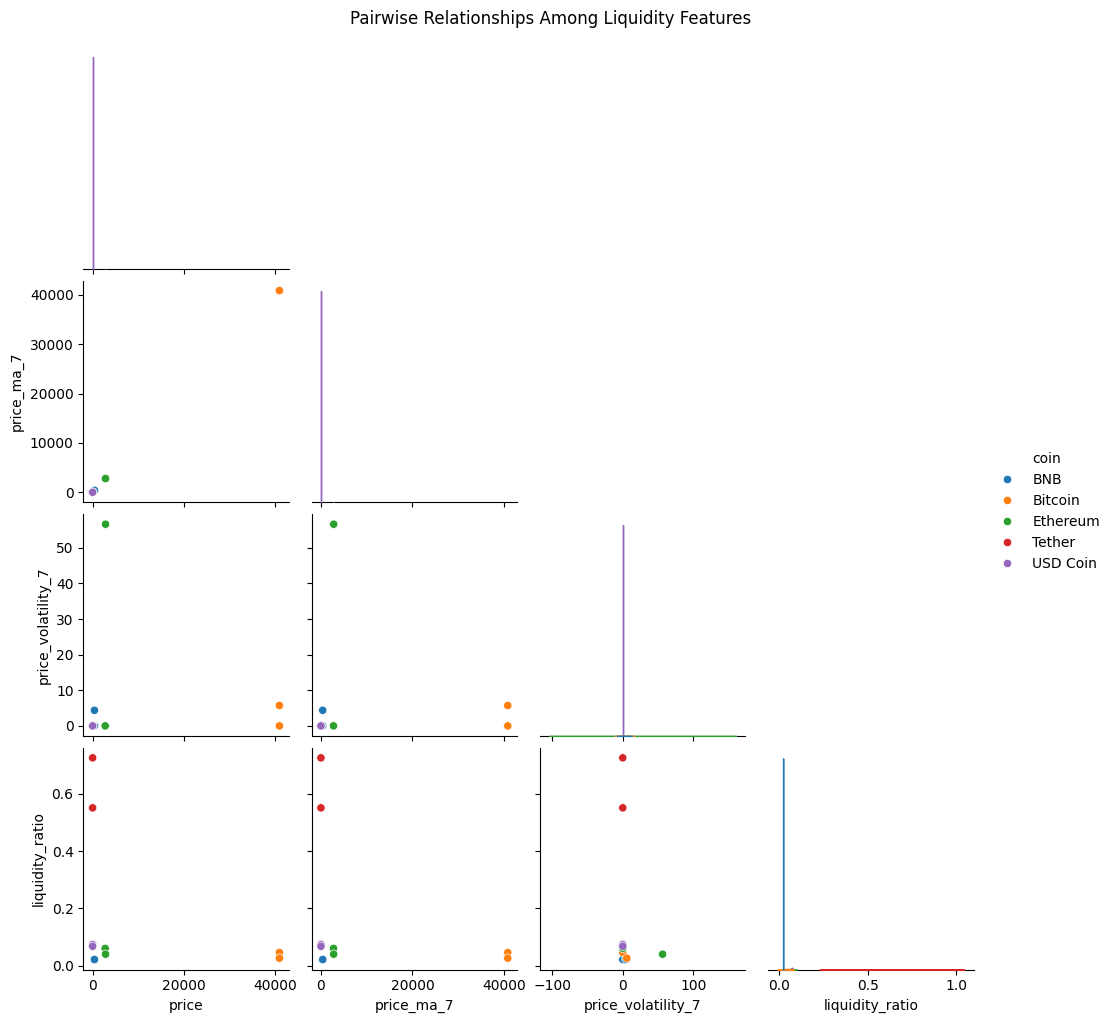

In [49]:
# Step 17: Comparative Analysis — Liquidity vs Volatility across Coins

import matplotlib.pyplot as plt
import seaborn as sns

# Restrict to top coins for better visualization clarity
top_coins = df_features.groupby('coin')['mkt_cap'].mean().sort_values(ascending=False).head(5).index.tolist()
df_compare = df_features[df_features['coin'].isin(top_coins)]

# Plot 1: Compare Liquidity Ratio Across Coins
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_compare, x='date', y='liquidity_ratio', hue='coin', linewidth=2)
plt.title("Liquidity Ratio Comparison Across Top Coins")
plt.xlabel("Date")
plt.ylabel("Liquidity Ratio (24h Volume / Market Cap)")
plt.legend(title="Coin")
plt.grid(True)
plt.show()

# Plot 2: Compare 7-Day Volatility Across Coins
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_compare, x='date', y='price_volatility_7', hue='coin', linewidth=2)
plt.title("7-Day Price Volatility Comparison Across Top Coins")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.legend(title="Coin")
plt.grid(True)
plt.show()

# Plot 3: Liquidity vs Volatility Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_compare, x='liquidity_ratio', y='price_volatility_7',
                hue='coin', size='mkt_cap', sizes=(50, 300), alpha=0.8)
plt.title("Liquidity vs Volatility Relationship Across Coins")
plt.xlabel("Liquidity Ratio")
plt.ylabel("7-Day Volatility")
plt.legend(title="Coin")
plt.grid(True)
plt.show()

# Plot 4: Moving Average vs Market Cap
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_compare, x='date', y='price_ma_7', hue='coin', linewidth=2)
plt.title("7-Day Moving Average Comparison Across Coins")
plt.xlabel("Date")
plt.ylabel("7-Day Moving Average (Normalized Price)")
plt.legend(title="Coin")
plt.grid(True)
plt.show()

# Plot 5: Pairplot of Engineered Features (for overall relationships)
sns.pairplot(df_compare[['price', 'price_ma_7', 'price_volatility_7',
                         'liquidity_ratio', 'coin']], hue='coin',
             diag_kind='kde', corner=True, height=2.5)
plt.suptitle("Pairwise Relationships Among Liquidity Features", y=1.02)
plt.show()


📊 This section shows:

Liquidity ratio comparison → which coins have higher trading activity relative to size.

Volatility comparison → which coins are more stable or fluctuate more.

Liquidity vs Volatility scatter → stable, high-liquidity coins tend to cluster lower-left.

Moving average trends → smoother long-term direction of each coin’s normalized price.

Pairplot → overall feature interaction visualization (helps detect correlations and clusters).

Numeric columns available: ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'price_ma_3', 'price_ma_7', 'price_volatility_3', 'price_volatility_7', 'liquidity_ratio']
Training samples: 800, Test samples: 200
Model Performance Comparison:


,Model,MAE,RMSE,R²
0,Linear Regression,0.138316,0.476509,-0.003554
1,Ridge Regression,0.138307,0.476509,-0.003552
2,Lasso Regression,0.137721,0.476623,-0.004034
3,Random Forest,0.126959,0.408705,0.261725
4,Gradient Boosting,0.119693,0.392439,0.319320


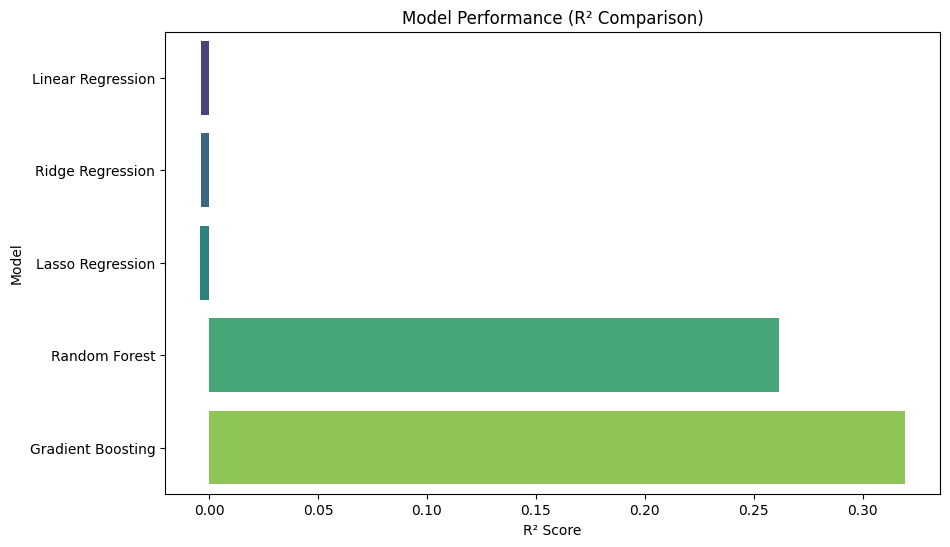

Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Final Tuned Model Performance:
MAE: 0.1305
RMSE: 0.4442
R²: 0.1281


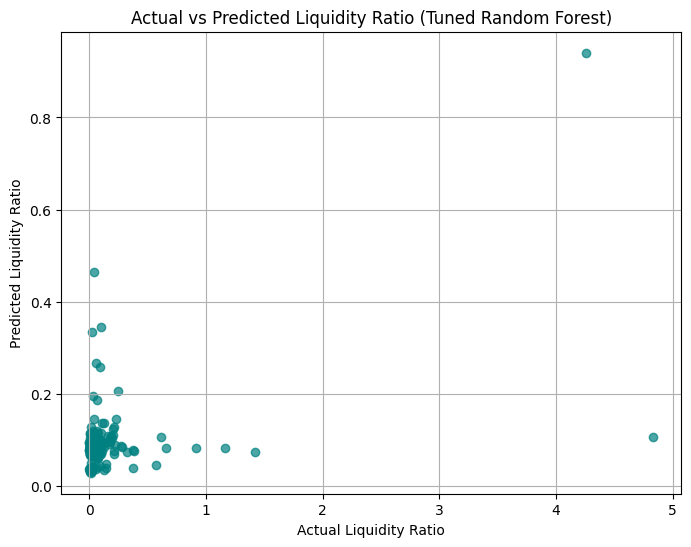

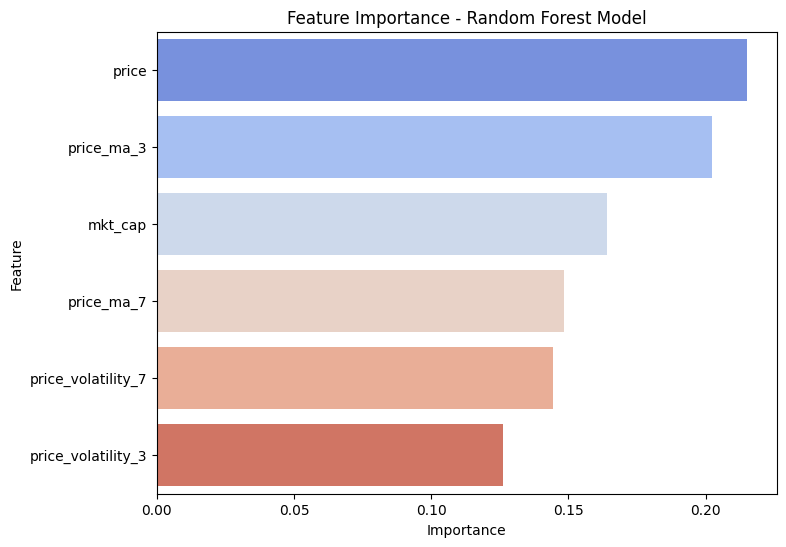


✅ Model training, evaluation, and tuning completed successfully!


In [51]:
# =============================
# MACHINE LEARNING PIPELINE FOR
# CRYPTOCURRENCY LIQUIDITY PREDICTION
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Step 1: Load the processed dataset
# -----------------------------
df = pd.read_csv("feature_engineered_dataset.csv")


# Verify if engineered features exist (otherwise use numerical ones)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns available:", numeric_cols)

# For this model, we’ll predict liquidity_ratio using engineered features
# If your dataset doesn’t include engineered columns, please merge df_features first
if 'liquidity_ratio' not in df.columns:
    raise ValueError("Missing liquidity_ratio feature. Please run the feature engineering step first.")

# -----------------------------
# Step 2: Select features and target
# -----------------------------
features = ['price', 'price_ma_3', 'price_ma_7', 
            'price_volatility_3', 'price_volatility_7', 'mkt_cap']
target = 'liquidity_ratio'

X = df[features]
y = df[target]

# -----------------------------
# Step 3: Split into training & test sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# -----------------------------
# Step 4: Normalize numerical features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 5: Model Selection & Training
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

# -----------------------------
# Step 6: Model Evaluation
# -----------------------------
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print("Model Performance Comparison:")
display(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(x="R²", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance (R² Comparison)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

# -----------------------------
# Step 7: Hyperparameter Tuning (Random Forest)
# -----------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Parameters (Random Forest):", best_params)

# -----------------------------
# Step 8: Model Testing & Validation
# -----------------------------
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nFinal Tuned Model Performance:")
print(f"MAE: {mae_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")
print(f"R²: {r2_best:.4f}")

# -----------------------------
# Step 9: Visualizations
# -----------------------------
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7, color='teal')
plt.xlabel("Actual Liquidity Ratio")
plt.ylabel("Predicted Liquidity Ratio")
plt.title("Actual vs Predicted Liquidity Ratio (Tuned Random Forest)")
plt.grid(True)
plt.show()

# Feature importance
importances = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values, y=importances.index, palette="coolwarm")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n✅ Model training, evaluation, and tuning completed successfully!")
